In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from autograd import numpy as anp
from autograd import grad

### Problem 1

In [2]:
def get_func():
    
    # Define the function
    sym_x = sy.symbols('x')
    sym_fx = (sy.sin(sym_x)+1)**(sy.sin(sy.cos(sym_x)))
    
    # Lambdify the function
    fx = sy.lambdify(sym_x, sym_fx, 'numpy')
    
    # Lambdify the derivative function
    diff_fx = sy.lambdify(sym_x, sy.diff(sym_fx), 'numpy')
    
    # return two functions
    return fx, diff_fx

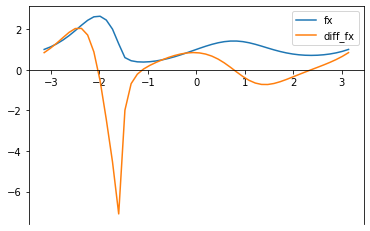

In [3]:
# Plot f and f' on [-pi, pi]
x = np.linspace(-np.pi, np.pi)
fx, diff_fx = get_func()
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
plt.plot(x, fx(x), label='fx')
plt.plot(x, diff_fx(x), label='diff_fx')
plt.legend()

### Problem 2

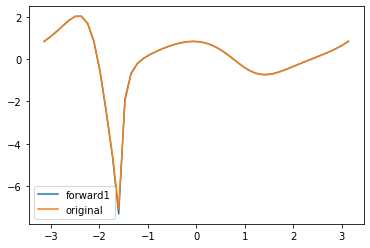

In [4]:
# Operate forward with order 1
def fwd1(f, x, h):
    return (f(x+h)-f(x))/h

# Plot forward approximation with order 1
x = np.linspace(-np.pi, np.pi)
f1=fwd1(fx,x,0.01)
plt.plot(x, f1, label='forward1')
plt.plot(x, diff_fx(x), label='original')
plt.legend()

The result of Foward 1 approximation is quite close to the exact result in this case.

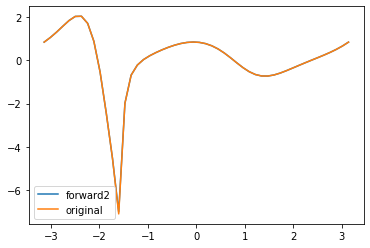

In [5]:
# Operate forward with order 2

def fwd2(f, x, h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/2/h

# Plot forward approximation with order 2
x = np.linspace(-np.pi, np.pi)
f2=fwd2(fx,x,0.01)
plt.plot(x, f2, label='forward2')
plt.plot(x, diff_fx(x), label='original')
plt.legend()

The result of Foward 2 approximation is quite close to the exact result in this case.

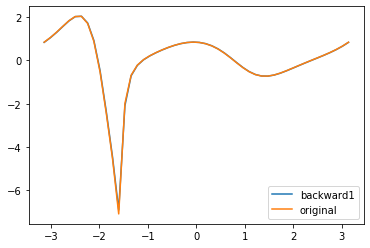

In [6]:
# Operate backward with order 1

def bwd1(f, x, h):
    return (f(x)-f(x-h))/h

# Plot backward approximation with order 1
x = np.linspace(-np.pi, np.pi)
b1=bwd1(fx,x,0.01)
plt.plot(x, b1, label='backward1')
plt.plot(x, diff_fx(x), label='original')
plt.legend()

The result of Backward 1 approximation is quite close to the exact result in this case.

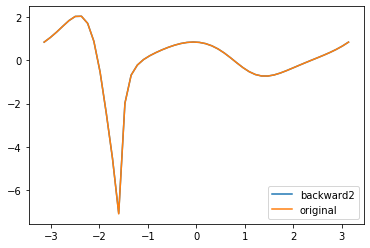

In [7]:
# Operate backward with order 2

def bwd2(f, x, h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/2/h

# Plot backward approximation with order 2
x = np.linspace(-np.pi, np.pi)
b2=bwd2(fx,x,0.01)
plt.plot(x, b2, label='backward2')
plt.plot(x, diff_fx(x), label='original')
plt.legend()

The result of Backward 2 approximation is quite close to the exact result in this case.

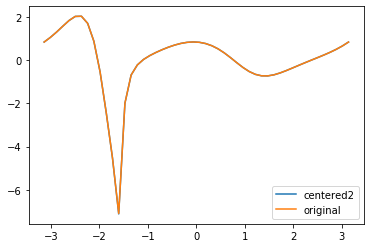

In [8]:
# Operate centered with order 2

def ctr2(f, x, h):
    return (f(x+h)-f(x-h))/2/h

# Plot centered approximation with order 2
x = np.linspace(-np.pi, np.pi)
c2=ctr2(fx,x,0.01)
plt.plot(x, c2, label='centered2')
plt.plot(x, diff_fx(x), label='original')
plt.legend()

The result of Center 2 approximation is quite close to the exact result in this case.

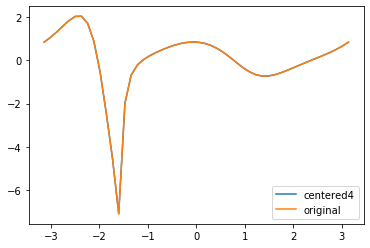

In [9]:
# Operate centered with order 4

def ctr4(f, x, h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/12/h

# Plot centered approximation with order 4
x = np.linspace(-np.pi, np.pi)
c4=ctr4(fx,x,0.01)
plt.plot(x, c4, label='centered4')
plt.plot(x, diff_fx(x), label='original')
plt.legend()

The result of Center 4 approximation is quite close to the exact result in this case.

We can see that all the six methods are good approximation in this case.

### Problem 3

In [10]:
def error(n):
    
    h = np.logspace(-8, 0, 9)
    plt.figure(figsize = (8,5))

    # plot six lines of absolute errors
    plt.loglog(h, np.abs(diff_fx(n)-fwd1(fx,n,h)), label='Order 1 Forward', marker='o')
    plt.loglog(h, np.abs(diff_fx(n)-fwd2(fx,n,h)), label='Order 2 Forward', marker='o')
    plt.loglog(h, np.abs(diff_fx(n)-bwd1(fx,n,h)), label='Order 1 Backward', marker='o')
    plt.loglog(h, np.abs(diff_fx(n)-bwd2(fx,n,h)), label='Order 2 Backward', marker='o')
    plt.loglog(h, np.abs(diff_fx(n)-ctr2(fx,n,h)), label='Order 2 Centered', marker='o')
    plt.loglog(h, np.abs(diff_fx(n)-ctr4(fx,n,h)), label='Order 4 Centered', marker='o')
    plt.xlabel('h')
    plt.ylabel('Absolute Error')
    plt.legend()

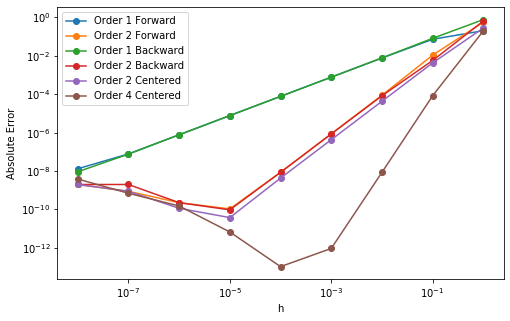

In [11]:
error(1)

### Problem 4

In [12]:
plane = np.load('plane.npy')
plane_df = pd.DataFrame(plane, columns=['time','alpha','beta'])
plane_df['alpha']=np.deg2rad(plane_df['alpha'])
plane_df['beta']=np.deg2rad(plane_df['beta'])

In [13]:
plane_df['x'] = (500*np.tan(plane_df['beta']))/(np.tan(plane_df['beta'])-np.tan(plane_df['alpha']))
plane_df['y'] = (500*np.tan(plane_df['beta'])*np.tan(plane_df['alpha']))/(np.tan(plane_df['beta'])-np.tan(plane_df['alpha']))


In [14]:
plane_df['x_prime'] = plane_df['x']
plane_df['y_prime'] = plane_df['y']

plane_df['x_prime'][0] = plane_df['x'][1]-plane_df['x'][0]
plane_df['y_prime'][0] = plane_df['y'][1]-plane_df['y'][0]

plane_df['x_prime'][7] = plane_df['x'][7]-plane_df['x'][6]
plane_df['y_prime'][7] = plane_df['y'][7]-plane_df['y'][6]

for i in range(1,7):
    plane_df['x_prime'][i] = (plane_df['x'][i+1]-plane_df['x'][i-1])/2
    plane_df['y_prime'][i] = (plane_df['y'][i+1]-plane_df['y'][i-1])/2

plane_df['speed'] = np.sqrt(plane_df['x_prime']**2+plane_df['y_prime']**2)

In [15]:
plane_df[['time','speed']]

,time,speed
0,7.0,46.424201
1,8.0,47.001039
2,9.0,48.998805
3,10.0,50.099442
4,11.0,48.290351
5,12.0,51.564559
6,13.0,53.923034
7,14.0,51.514801


### Problem 5

In [16]:
# Define the Jacobian function

def jb_mat(vec_f, vec_x, h):
    n = len(vec_x)
    m = len(vec_f)
    
    # define standard basis
    e = np.identity(n)
    # get a m*n matrix
    jacob = np.zeros((m,n))
    
    # calculate entry for the matrix
    for i in range(0,n):
        for j in range(0,m):
            jacob[j,i]=((vec_f[j](vec_x+h*e[i])-vec_f[j](vec_x-h*e[i])))/2/h
            
    return jacob

In [17]:
# Test the Jacobian function
fset = [lambda x: x[0]**2,lambda x: x[0]**3-x[1]]
jb_mat(fset, [1,1], 0.0001)

array([[ 2.        ,  0.        ],
       [ 3.00000001, -1.        ]])

In [18]:
np.full((3,2), 0, dtype = 'float')

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

### Problem 7

In [19]:
def t_error(N):
    
    
    prob1_time = []
    prob1_error = [10**(-18)]*N
    prob3_time = []
    prob3_error = []
    prob7_time = []
    prob7_error = []
    
    # From problem 3, we can use h = e-18 for centred approximation with order 4
    h = 10**(-4)
    
    for i in range(N):
        
        # choose a random value x0
        x0 = np.random.random()
        
        # time and absolute error for Sympy method
        start = time.time()
        fx, diff_fx = get_func()
        exact = diff_fx(x0)
        end = time.time()
        prob1_time.append(end-start)
        
        # time and absolute error for difference quotient method
        start = time.time()
        approx = ctr4(fx, x0, h)
        end = time.time()
        prob3_time.append(end-start)
        prob3_error.append(np.abs(exact-approx))
        
        # time and absolute error for autograd method
        start = time.time()
        g=lambda x0: (anp.sin(x0)+1)**(anp.sin(anp.cos(x0))) 
        dg=grad(g)
        approx=dg(x0)
        end = time.time()
        prob7_time.append(end-start)
        prob7_error.append(np.abs(exact-approx))
        
    return prob1_time,prob1_error,prob3_time,prob3_error,prob7_time,prob7_error
    
    

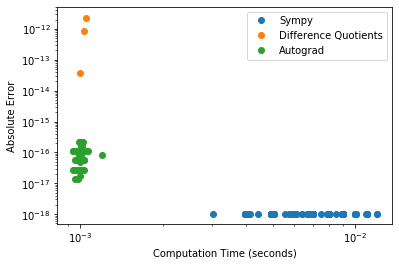

In [20]:
# Test the function when N = 200
prob1_time,prob1_error,prob3_time,prob3_error,prob7_time,prob7_error = t_error(200)
plt.loglog(prob1_time,prob1_error,'o',label='Sympy')
plt.loglog(prob3_time,prob3_error,'o',label='Difference Quotients')
plt.loglog(prob7_time,prob7_error,'o',label='Autograd')
plt.xlabel('Computation Time (seconds)')
plt.ylabel('Absolute Error')
plt.legend()

We can see that the Difference Quotient has the higest absolute error but the fastest speed while the Sympy method has slowest speed, but the most accuracy.